In [1]:
from io import StringIO
import matplotlib.pyplot as plt
'exec(% matplotlib inline)'
import numpy as np
import pickle
import pandas as pd
from requests import get
import seaborn as sn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
file_bytes = get(url).content
data_file = StringIO(file_bytes.decode('utf-8'))

feature_names_heart=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
label_name_heart = "target"

heart_df = pd.read_csv('heart.csv')

#heart_df = pd.read_csv(data_file)
#column_names_heart = feature_names_heart + [label_name_heart]
#heart_df = pd.read_csv(data_file, names=feature_names_heart + [label_name_heart])


In [4]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
77   1    0   125       304   0    0        162      1      0.0      2      3   2     0         1
51   0    2   130       256   0    0        149      0      0.5      2      0   2     1         1
              140       308   0    0        142      0      1.5      2      1   2     1         1
     1    0   140       261   0    0        186      1      0.0      2      0   2     1         1
                                                                                               ..
59   1    0   138       271   0    0        182      0      0.0      2      0   2     1         1
              140       177   0    1        162      1      0.0      2      1   3     0         1
              164       176   1    0        90       0      1.0      1      2   1     0         1
              170       3

In [7]:
display(heart_df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
rows_with_missing = heart_df.eq("?").any(1)

In [9]:
heart_df_nm = heart_df[~rows_with_missing]

In [10]:
heart_df_nm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


Text(0.5, 1.0, 'Pearson Correlation')

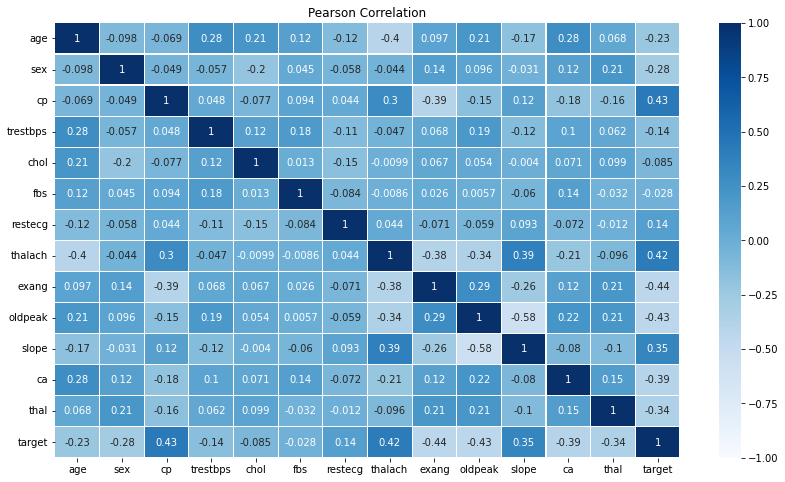

In [11]:
pearsonCorr = heart_df_nm.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sn.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

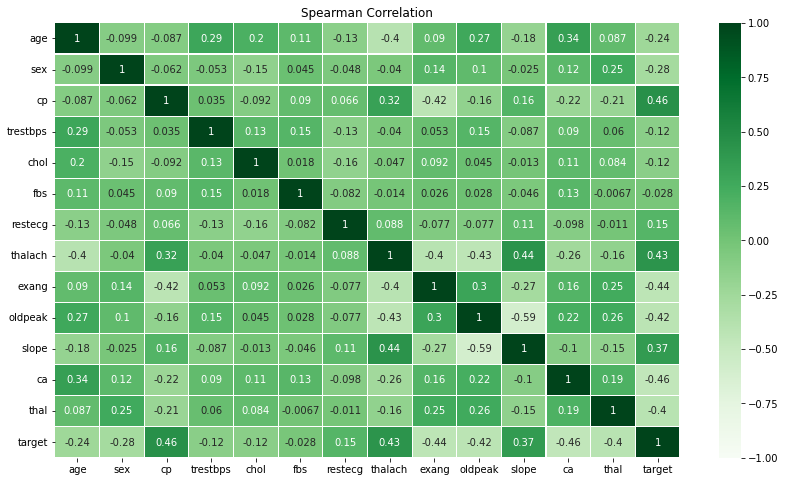

In [12]:
spearmanCorr = heart_df_nm.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sn.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [13]:
a = pd.get_dummies(heart_df_nm['cp'], prefix = "cp")
b = pd.get_dummies(heart_df_nm['ca'], prefix = "ca")
c = pd.get_dummies(heart_df_nm['slope'], prefix = "slope")
d = pd.get_dummies(heart_df_nm['restecg'], prefix = "restecg")
f = pd.get_dummies(heart_df_nm['thal'], prefix = "thal")
data = [heart_df_nm, a, b, c, d, f]
heart_df_concat = pd.concat(data, axis=1)

In [14]:
heart_df_concat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [15]:
heart_df_final = heart_df_concat.drop(columns=['cp', 'ca', 'slope', 'restecg', 'thal'])
heart_df_final

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [16]:
y = heart_df_final.target.values
X = heart_df_final.drop(['target'], axis=1)

In [17]:
x_column_names = X.columns
scaler = preprocessing.MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=x_column_names)
X_normalized.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2,random_state=0)

In [19]:
model_scores = []

def report_score(y_test, y_pred):
  print("AUC:", roc_auc_score(y_test, y_pred))
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))


  cm = confusion_matrix(y_test, y_pred)
  conf_matrix = pd.DataFrame(data = cm,
                            columns = ['Predicted:0', 'Predicted:1'],
                            index =['Actual:0', 'Actual:1'])
  plt.figure(figsize = (8, 5))
  sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
  plt.show()
  
  print('The details for confusion matrix is =')
  print (classification_report(y_test, y_pred))

In [20]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

AUC: 0.8523965141612201
Accuracy: 0.8524590163934426
Precision: 0.8787878787878788
Recall: 0.8529411764705882


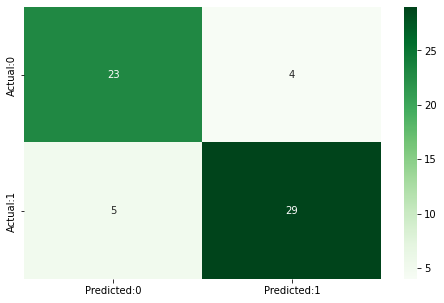

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [21]:
report_score(y_test, y_pred)
model_scores.append(('Logistic Regression', y_test, y_pred.copy()))

In [22]:
dt_model = tree.DecisionTreeClassifier(max_depth=15, random_state=0)
clf = dt_model.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

AUC: 0.7859477124183006
Accuracy: 0.7868852459016393
Precision: 0.8181818181818182
Recall: 0.7941176470588235


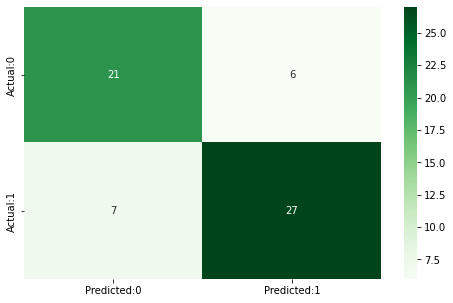

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [23]:
report_score(y_test, y_pred)
model_scores.append(('Decision Tree Classification', y_test, y_pred.copy()))

In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

AUC: 0.8485838779956427
Accuracy: 0.8524590163934426
Precision: 0.8571428571428571
Recall: 0.8823529411764706


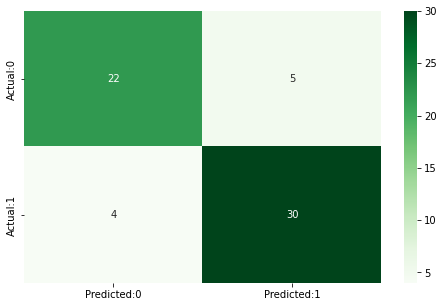

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [25]:
report_score(y_test, y_pred)
model_scores.append(('KNN Classification', y_test, y_pred.copy()))

In [26]:
rf_model = RandomForestClassifier(max_depth=15, random_state=0)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

AUC: 0.8709150326797386
Accuracy: 0.8688524590163934
Precision: 0.90625
Recall: 0.8529411764705882


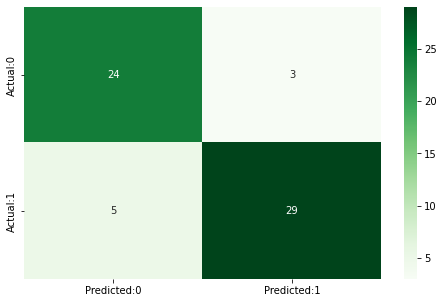

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [27]:
report_score(y_test, y_pred)
model_scores.append(('RandomForest Classification', y_test, y_pred.copy()))

In [28]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

AUC: 0.8709150326797386
Accuracy: 0.8688524590163934
Precision: 0.90625
Recall: 0.8529411764705882


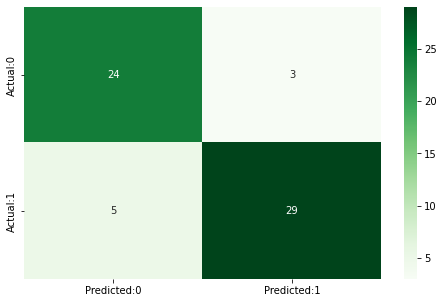

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [29]:
report_score(y_test, y_pred)
model_scores.append(('XGB Classification', y_test, y_pred.copy()))

In [30]:
print("***** AUC *****")
for score in model_scores:
  name, yt, yp = score
  print("{}:{:4f}".format(name, roc_auc_score(yt, yp)))

print("***** Accuracy *****")
for score in model_scores:
  name, yt, yp = score
  print("{}:{:4f}".format(name, accuracy_score(yt, yp)))

print("***** Precision *****")
for score in model_scores:
  name, yt, yp = score
  print("{}:{:4f}".format(name, precision_score(yt, yp)))

print("***** Recall *****")
for score in model_scores:
  name, yt, yp = score
  print("{}:{:4f}".format(name, recall_score(yt, yp)))



***** AUC *****
Logistic Regression:0.852397
Decision Tree Classification:0.785948
KNN Classification:0.848584
RandomForest Classification:0.870915
XGB Classification:0.870915
***** Accuracy *****
Logistic Regression:0.852459
Decision Tree Classification:0.786885
KNN Classification:0.852459
RandomForest Classification:0.868852
XGB Classification:0.868852
***** Precision *****
Logistic Regression:0.878788
Decision Tree Classification:0.818182
KNN Classification:0.857143
RandomForest Classification:0.906250
XGB Classification:0.906250
***** Recall *****
Logistic Regression:0.852941
Decision Tree Classification:0.794118
KNN Classification:0.882353
RandomForest Classification:0.852941
XGB Classification:0.852941


In [22]:
# lr_model = LogisticRegression()
# lr_model.fit(x_train, y_train)
# y_pred = lr_model.predict(x_test)

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold


def train(df_train, y_train, C=1.0):
    dicts = df_train[x_column_names].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model


def predict(df, dv, model):
    dicts = df[x_column_names].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred



# output_file = 'xgb_model.bin'
# f_out = open(output_file, 'wb') 
# pickle.dump((dv, model), f_out)
# f_out.close()


In [24]:
dv, model = train(X_normalized, y, C=1.0)
y_pred = predict(x_test, dv, model)
auc = roc_auc_score(y_test, y_pred)
auc

0.9640522875816994

In [25]:
output_file = 'model.bin'
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [26]:
!ls -lh *.bin

-rw-r--r-- 1 root root 1.7K Nov  3 01:20 model.bin


In [27]:
dv = None
model = None
input_file = output_file
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)
print(dv)
print(model)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [28]:
X_normalized.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
